<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0510/02_crawling_casestudy_1(%EC%9A%94%EC%B2%AD%EA%B1%B0%EC%A0%88%EB%8B%B9%ED%95%9C%ED%8E%98%EC%9D%B4%EC%A7%80)(%EC%88%98%EC%97%85%EC%A4%91)_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# request 요청이 거절당한 경우 헤더 변경하여 크롤링하기  


#### 요청이 거절당했을 때 대처법 : 브라우저인척 하기

In [ ]:
# 브라우저의 헤더 가져와서 요청하기
headers = {'referer': 'https://n.news.naver.com/mnews/article/417/0000919532?sid=101',
'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'}

requests.get(url, headers=headers)

### 뉴스 링크 크롤링

네이버 뉴스는 1. 각 언론사에에 게재된 뉴스와 2. 네이버 뉴스 플랫폼에 기재된 뉴스로 나뉩니다. 
각 언론사 홈페이지마다 html 형식이 다르기 때문에 통일된 html형식을 가지고 있는 네이버 뉴스 플랫폼 내의 기사들을 수집하도록 하겠습니다.   
네이버 뉴스 플랫폼 링크는 아래 사진 태그 위치에서 얻을 수 있습니다. 

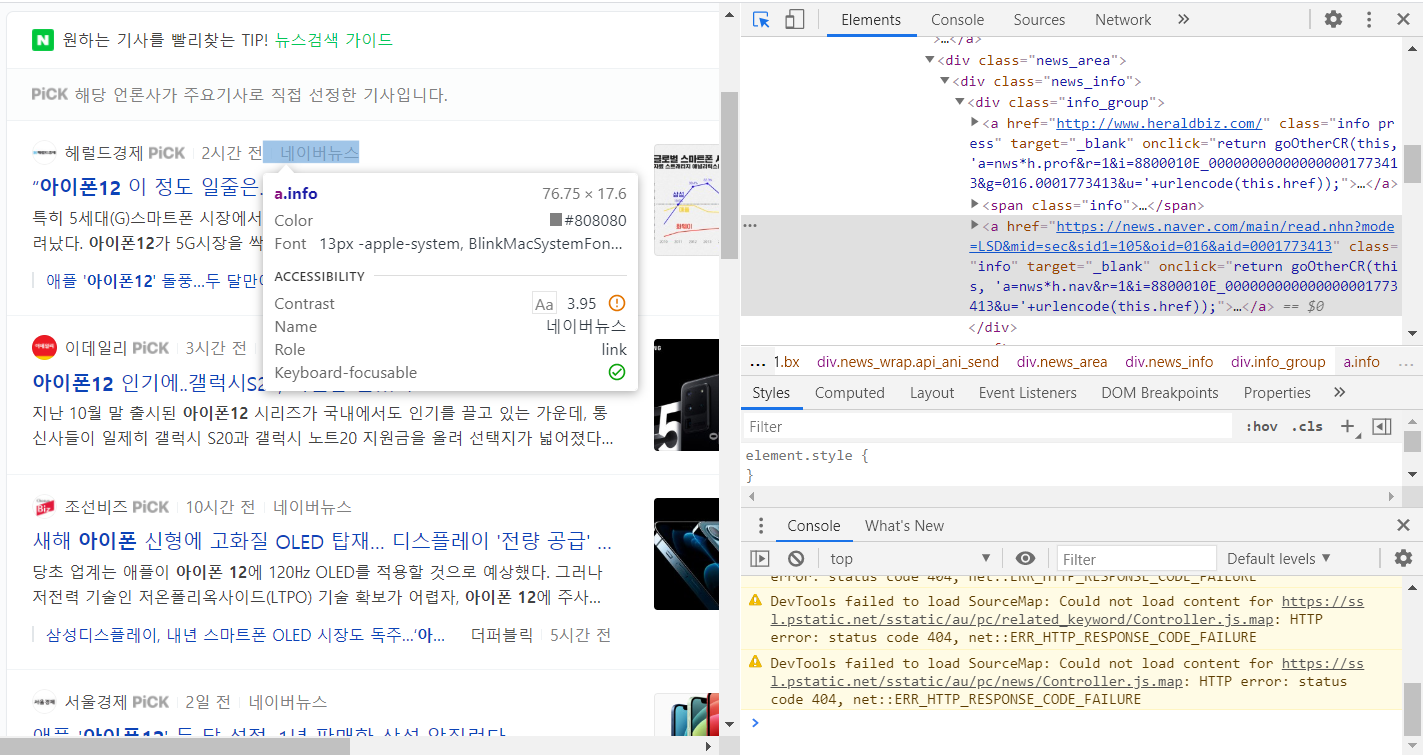

#### 1) 네이버뉴스페이지 가져오기

In [ ]:
import requests 
from bs4 import BeautifulSoup

news_urls = []

for i in range(10):
    url = 'https://search.naver.com/search.naver'

    params = {
        'where':'news',
        'query':'삼성전자',
        'start': i*10 + 1
    }

    resp = requests.get(url, params=params)

    soup = BeautifulSoup(resp.content, 'lxml')

    a_tags = soup.select('a[class=info]') # class가 오직 info만 가지고 있는 a 태그
    # print(len(a_tags))
    # break

    for a_tag in a_tags:
        news_urls.append(a_tag['href'])
news_urls

['https://n.news.naver.com/mnews/article/003/0011649088?sid=101',
 'https://n.news.naver.com/mnews/article/031/0000723316?sid=101',
 'https://n.news.naver.com/mnews/article/366/0000870600?sid=105',
 'https://n.news.naver.com/mnews/article/629/0000196149?sid=105',
 'https://n.news.naver.com/mnews/article/421/0006583458?sid=101',
 'https://n.news.naver.com/mnews/article/374/0000319181?sid=101',
 'https://n.news.naver.com/mnews/article/003/0011648495?sid=101',
 'https://n.news.naver.com/mnews/article/018/0005407729?sid=101',
 'https://n.news.naver.com/mnews/article/366/0000870327?sid=105',
 'https://n.news.naver.com/mnews/article/009/0005076080?sid=101',
 'https://n.news.naver.com/mnews/article/277/0005205719?sid=102',
 'https://n.news.naver.com/mnews/article/029/0002779184?sid=105',
 'https://n.news.naver.com/mnews/article/243/0000038263?sid=101',
 'https://n.news.naver.com/mnews/article/243/0000038196?sid=101',
 'https://n.news.naver.com/mnews/article/081/0003333012?sid=101',
 'https://

In [ ]:
len(news_urls)

54

#### 2) 헤더 추가하기


- 브라우저로 둔갑시키기  
F12 -> 네트워크 탭 -> 보여지는 목록 중 하나 선택 ->  
우측에서 headers 탭 -> requests header 찾기 ->  
referer, user-agent 복사해오기

In [ ]:
for url in news_urls:
    headers = {'referer': 'https://n.news.naver.com/mnews/article/417/0000919532?sid=101',
                'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'}
    resps = requests.get(url, headers=headers) 
    soups = BeautifulSoup(resps.content, 'lxml')
    news_tag = soups.select('div#dic_area')
    for news in news_tag:
       news_in.append((news.text).strip())
news_in  

["기사내용 요약12인용 대비 식기 16개 추가 수납국내 최초 AI+ 인증…야간 저소음[서울=뉴시스]삼성전자 모델이 더욱 커지고 AI로 똑똑해진 14인용 비스포크 식기세척기 신제품을 선보이고 있다. (사진=삼성전자 제공) photo@newsis.com *재판매 및 DB 금지[서울=뉴시스] 이인준 기자 = 삼성전자가 14인용 '비스포크 식기세척기'를 국내 시장에 선보인다. 18일 삼성전자에 따르면 신제품은 세척 성능 시험 기준 12인용에서 14인용으로 용량이 증가했다. 기존 제품과 겉보기는 같지만, 내부에 식기를 16개 더 넣을 수 있다. 삼성전자가 출시한 첫 대용량 모델이다. 올해도 가전제품 대형화 추세가 뚜렷해지고 있다.세척력도 업그레이드됐다. 내부 하단의 양 날개가 반대 방향으로 회전하며 물을 분사하는 720도 무빙 세척 날개가 '4단 입체 물살'을 구현하며 빈틈없이 세척한다. 또 상단과 중단 바스켓을 위아래로 움직일 수 있는 '맥스 플렉스 3단 바구니'로 각종 식기를 효율적으로 쌓을 수 있다.삼성만의 AI(인공지능) 기능을 새로 추가해 사용자의 편의성을 높였다. 식기 오염도를 자동으로 파악해 물의 사용량과 온도·분사 세기 등을 조절해주는 'AI 맞춤 세척', 자주 사용하는 세척 패턴을 학습해 추천하는 'AI 맞춤 추천', 전면 패널에 다양한 정보를 문장으로 표시해주는 '대화형 알림창' 기능이 적용됐다. 식기세척기로는 국내 최초로 한국표준협회로부터 AI 분야 품질 인증인 'AI+인증'을 받았다. 사물인터넷 플랫폼 '스마트싱스'와 연결하면 스마트홈 기능을 이용할 수 있다. 조리한 음식에 맞춰 세척 코스를 추천받거나, 매달 20%의 에너지 사용량을 절감할 수 있는 AI 절약 모드 설정도 가능하다.열풍 건조 기능이 적용되며 원하는 건조 정도와 소요 시간에 따라 3단계 코스를 선택해 물방울 자국 없이 건조한다. 야간 저소음 코스 사용 시 표준 코스 대비 3㏈(데시벨) 낮은 최저 30㏈의 저소음을 구현했다. 심야의 교외에서 들리는 소음 수준이다.비스포크 식기세척기 

In [ ]:
len(news_in)